In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv(r"C:\Users\harri\Desktop\DataScienceProj\005_CarPurchase\german-vehicle-year.csv")

In [3]:
data.head(10)

,Unnamed: 0,carType,year
0,0,ICE,2011
1,1,ICE,2011
2,2,ICE,2011
3,3,ICE,2011
4,4,ICE,2011
5,5,EV,2011
6,6,ICE,2011
7,7,ICE,2011
8,8,ICE,2011
9,9,ICE,2011


In [4]:
data.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
data.head()

,carType,year
0,ICE,2011
1,ICE,2011
2,ICE,2011
3,ICE,2011
4,ICE,2011


In [6]:
import statsmodels.api as sm

In [7]:
data.groupby(["year"], as_index=False).count()

,year,carType
0,2011,4095
1,2012,4180
2,2013,4238
3,2014,4149
4,2015,4179
5,2016,4235
6,2017,4198
7,2018,4201
8,2019,4191
9,2020,4252


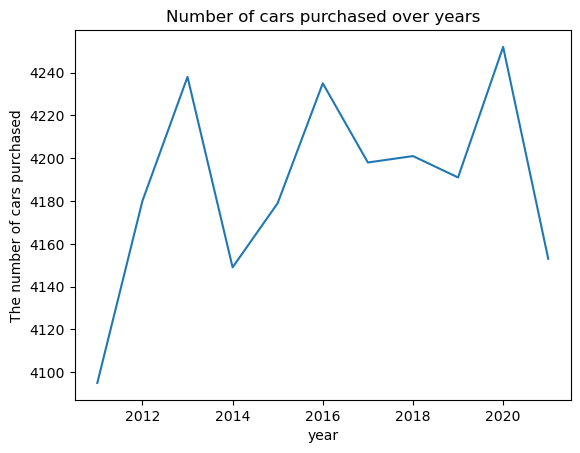

In [8]:
plt.title('Number of cars purchased over years')
plt.xlabel('year')
plt.ylabel('The number of cars purchased')
sns.lineplot(data=data.groupby(["year"], as_index=False).count(),x='year', y='carType')
plt.show()

**ICE**

In [9]:
ice = data.query('carType == "ICE"').groupby(["year"], as_index=False).count()
ice.rename(columns={"carType": "count"}, inplace=True)
ice

,year,count
0,2011,4070
1,2012,4136
2,2013,4174
3,2014,4069
4,2015,4093
5,2016,4121
6,2017,4071
7,2018,4067
8,2019,3988
9,2020,3816


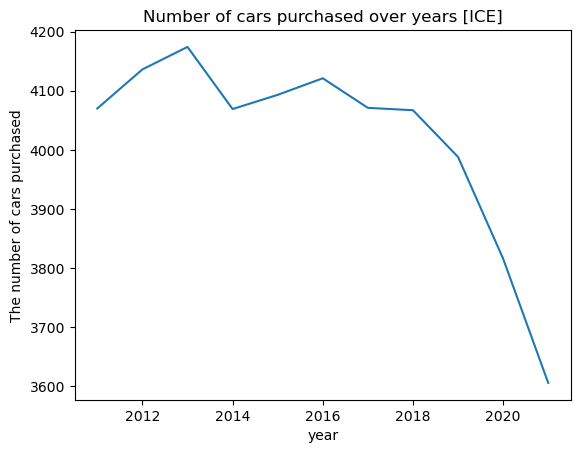

In [11]:
plt.title('Number of cars purchased over years [ICE]')
plt.xlabel('year')
plt.ylabel('The number of cars purchased')
sns.lineplot(data=ice,x='year', y='count')
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ice["count"], autolag ="AIC")
adf, pvalue,_,_,_,_ = adfuller(ice["count"])

print("ADF: ", round(adf,2))
print("p-value: ", round(pvalue,2))

ADF:  3.83
p-value:  1.0


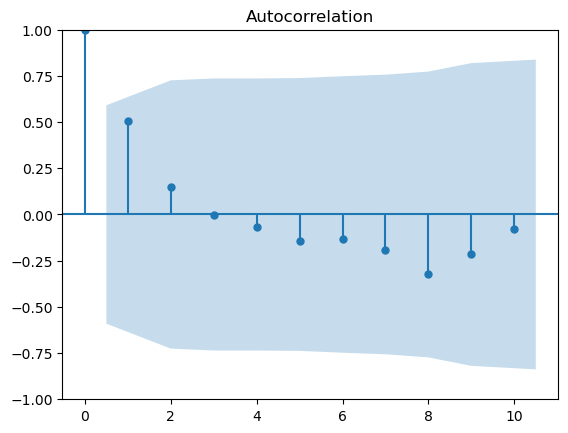

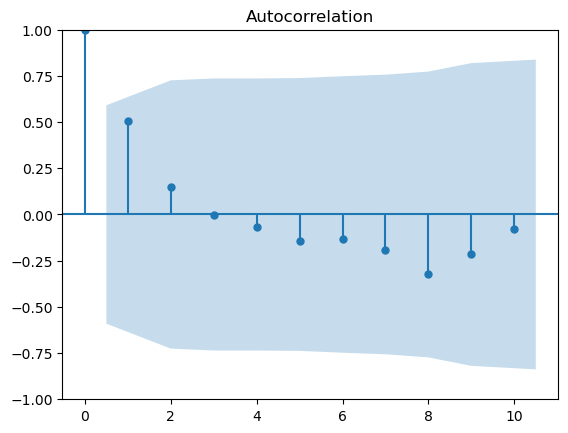

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ice["count"])

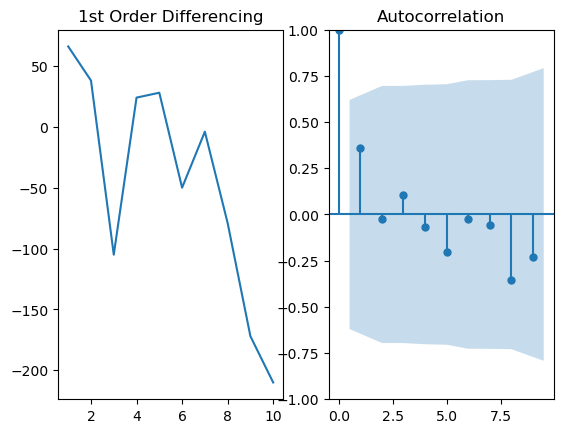

In [16]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(ice["count"].diff())

ax2 = f.add_subplot(122)
plot_acf(ice["count"].diff().dropna(), ax = ax2)
plt.show()


In [17]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [18]:
check_stationarity(ice["count"])

ADF Statistic: 3.828446
p-value: 1.000000
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
Non-stationary


In [21]:
# 3rd Ordering
check_stationarity(ice["count"].diff().diff().diff().dropna())

ADF Statistic: -8.644582
p-value: 0.000000
Critical Values:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Stationary


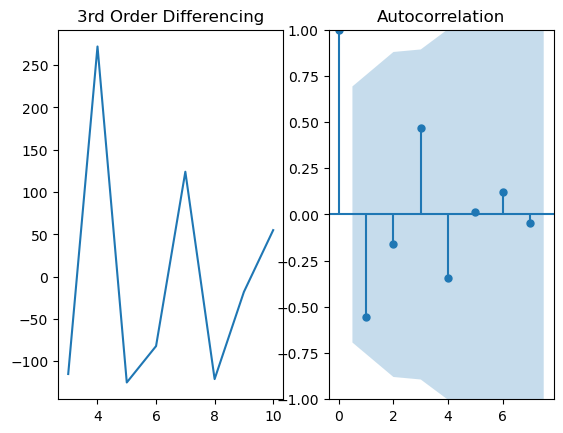

In [23]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("3rd Order Differencing")
ax1.plot(ice["count"].diff().diff().diff())

ax2 = f.add_subplot(122)
plot_acf(ice["count"].diff().diff().diff().dropna(), ax = ax2)
plt.show()


In [45]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

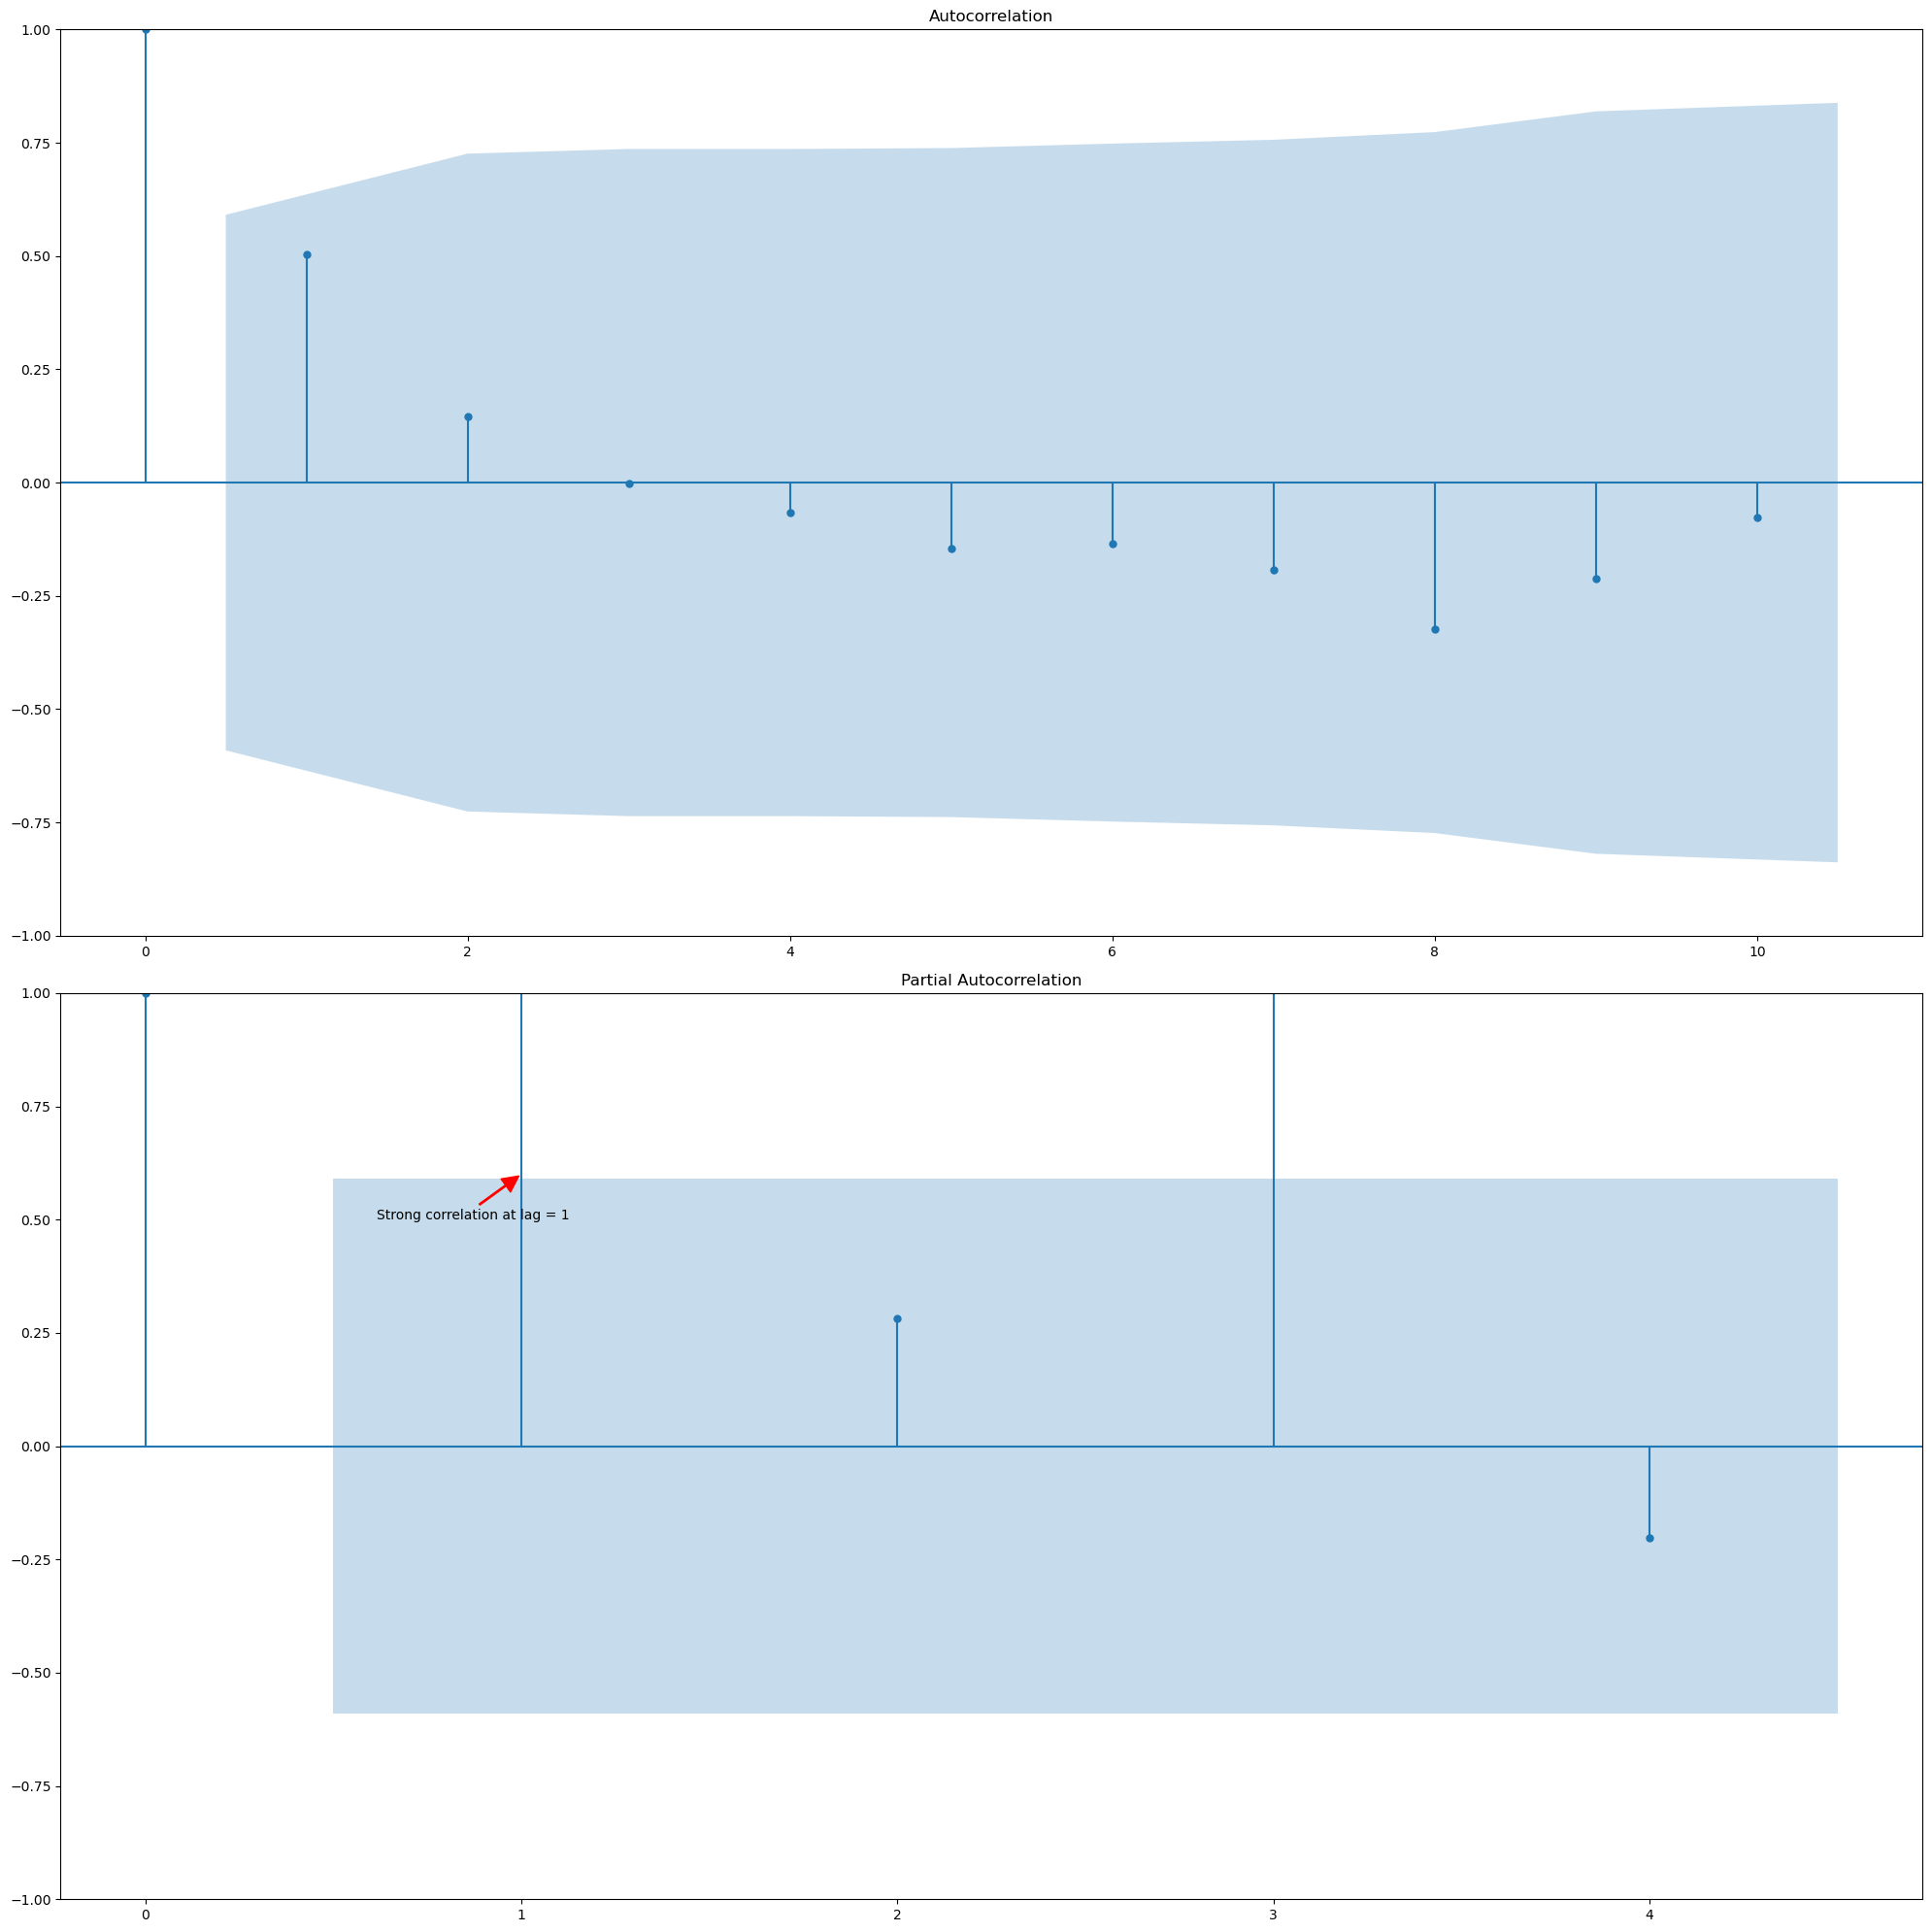

In [48]:
lag_acf = 10
lag_pacf = 4
height = 4
width = 12
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 2*10))
plot_acf(ice["count"].diff().diff().diff().dropna(), ax=ax[0])
plot_pacf(ice["count"].diff().diff().diff().dropna(), ax=ax[1], method='ols')

ax[1].annotate('Strong correlation at lag = 1', xy=(1, 0.6),  xycoords='data',
            xytext=(0.17, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

p = 2, q = 1, d = 2

In [49]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(ice['count'], order=(2, 0, 2)).fit()

c:\Users\harri\anaconda3\envs\dataScience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\harri\anaconda3\envs\dataScience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\harri\anaconda3\envs\dataScience\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
df_test = ice[['year', 'count']].loc[9:]
df = ice[['year', 'count']].loc[:8]

In [51]:
df_test.head()

,year,count
9,2020,3816
10,2021,3606


In [53]:
df.head(10)

,year,count
0,2011,4070
1,2012,4136
2,2013,4174
3,2014,4069
4,2015,4093
5,2016,4121
6,2017,4071
7,2018,4067
8,2019,3988


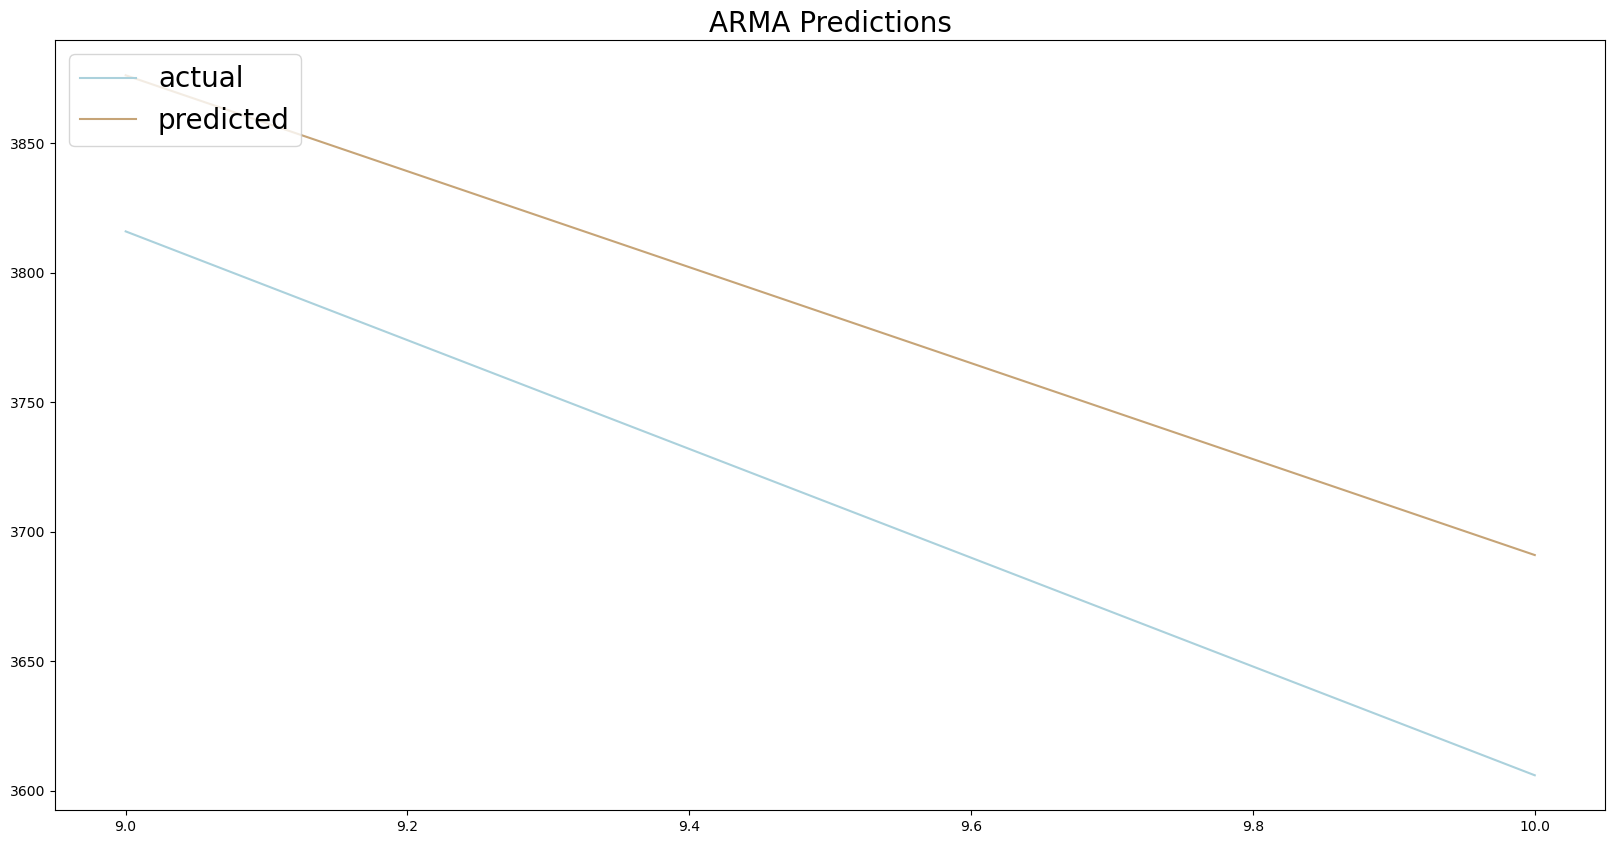

In [54]:
# generate predictions
df_pred = ARMA_model.predict(start=9, end=10)
# plot actual vs. predicted
fig = plt.figure(figsize=(20, 10))
plt.title('ARMA Predictions', fontsize=20)
plt.plot(df_test['count'], label='actual', color='#ABD1DC')
plt.plot(df_pred, label='predicted', color='#C6A477')
plt.legend(fontsize =20, loc='upper left')

In [56]:
ARMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                   11
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -63.582
Date:                Sat, 28 Jan 2023   AIC                            139.164
Time:                        11:48:56   BIC                            141.551
Sample:                             0   HQIC                           137.659
                                 - 11                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3896.3811    364.638     10.686      0.000    3181.704    4611.059
ar.L1          1.8037      0.245      7.362      0.000       1.324       2.284
ar.L2         -0.8890      0.248     -3.579      0.000      -1.376      -0.402
ma.L1         -0.0014    133.000  -1.09e-05      1.000    -260.676     260.673
ma.L2         -0.9986      0.693     -1.440      0.150      -2.357       0.360
sigma2      3295.2041      0.040   8.19e+04      0.000    3295.125    3295.283
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.69   Prob(JB):                         0.87
Heteroskedasticity (H):               1.27   Skew:                             0.19
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.68e+24. Standard errors may be unstable.
"""

In [64]:
# 1st order
diff_ice = ice['count'] - ice['count'].shift(1)
diff_ice = diff_ice.dropna(inplace=False)
seasonal_diff = diff_ice - diff_ice.shift(3)
seasonal_diff = seasonal_diff.dropna(inplace=False)
diff_ice

1      66.0
2      38.0
3    -105.0
4      24.0
5      28.0
6     -50.0
7      -4.0
8     -79.0
9    -172.0
10   -210.0
Name: count, dtype: float64

In [65]:
seasonal_diff

4     -42.0
5     -10.0
6      55.0
7     -28.0
8    -107.0
9    -122.0
10   -206.0
Name: count, dtype: float64

In [66]:
check_stationarity(seasonal_diff)

ADF Statistic: 0.053125
p-value: 0.962711
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Non-stationary


In [58]:
#2nd order
diff_ice2 = diff_ice - diff_ice.shift(1)
diff_ice2 = diff_ice2.dropna(inplace=False)
diff_ice2

2     -28.0
3    -143.0
4     129.0
5       4.0
6     -78.0
7      46.0
8     -75.0
9     -93.0
10    -38.0
Name: count, dtype: float64

C:\Users\harri\AppData\Local\Temp\ipykernel_9464\2184943205.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


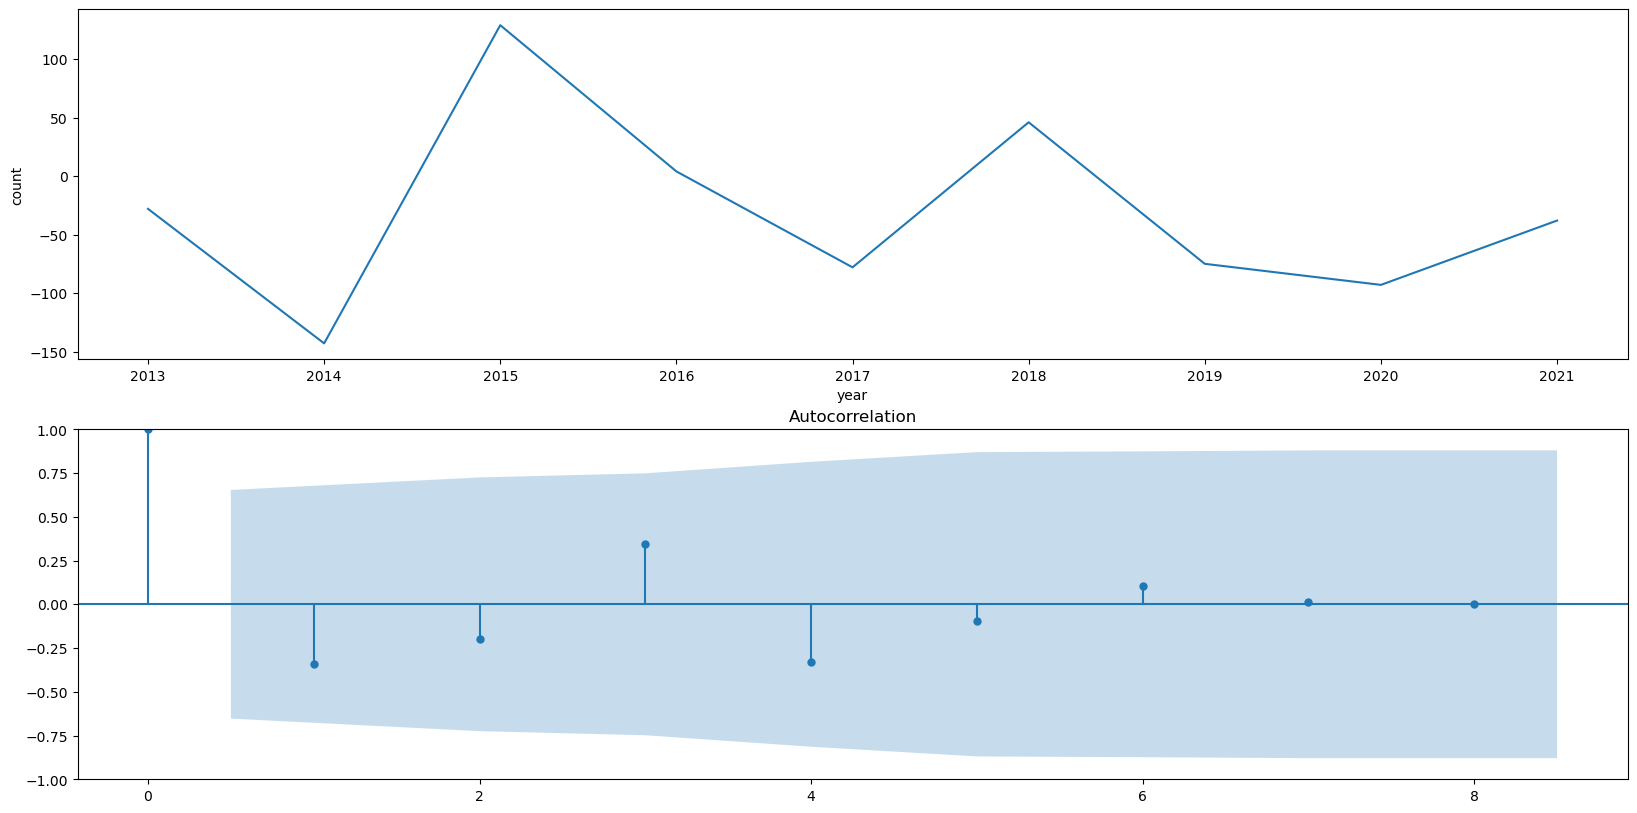

In [63]:
# ACF after trend 2st differencing
fig = plt.figure(figsize=(20, 10))
subplot1 = fig.add_subplot(211)
subplot2 = fig.add_subplot(212)
sns.lineplot(x=ice['year'],  y=diff_ice2, ax=subplot1)
sm.graphics.tsa.plot_acf(diff_ice2, lags=8, ax=subplot2) 
fig.show()

In [60]:
check_stationarity(diff_ice2)

ADF Statistic: 0.318910
p-value: 0.978196
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Non-stationary


In [61]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ice["count"], autolag ="AIC")
adf, pvalue,_,_,_,_ = adfuller(diff_ice)

print("ADF: ", round(adf,2))
print("p-value: ", round(pvalue,2))

ADF:  -0.49
p-value:  0.89


In [62]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ice["count"], autolag ="AIC")
adf, pvalue,_,_,_,_ = adfuller(diff_ice2)

print("ADF: ", round(adf,2))
print("p-value: ", round(pvalue,2))

ADF:  0.32
p-value:  0.98


**EV**

In [20]:
data.query('carType == "EV"').groupby(["year"], as_index=False).count()

,year,carType
0,2011,25
1,2012,44
2,2013,64
3,2014,80
4,2015,86
5,2016,114
6,2017,127
7,2018,134
8,2019,203
9,2020,436


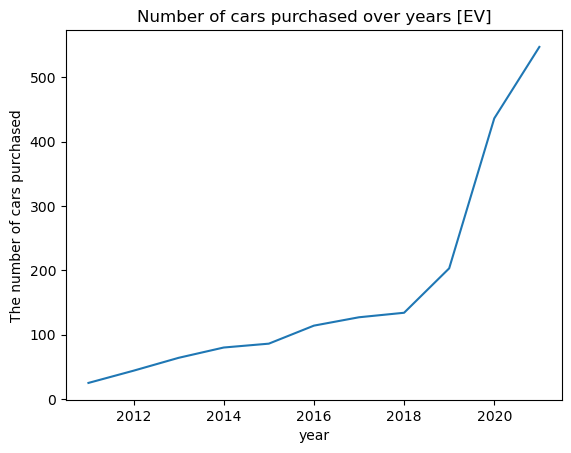

In [22]:
plt.title('Number of cars purchased over years [EV]')
plt.xlabel('year')
plt.ylabel('The number of cars purchased')
sns.lineplot(data=data.query('carType == "EV"').groupby(["year"], as_index=False).count(),x='year', y='carType')
plt.show()

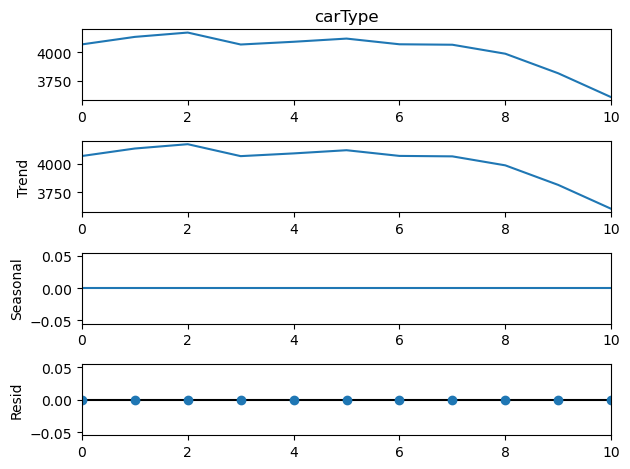

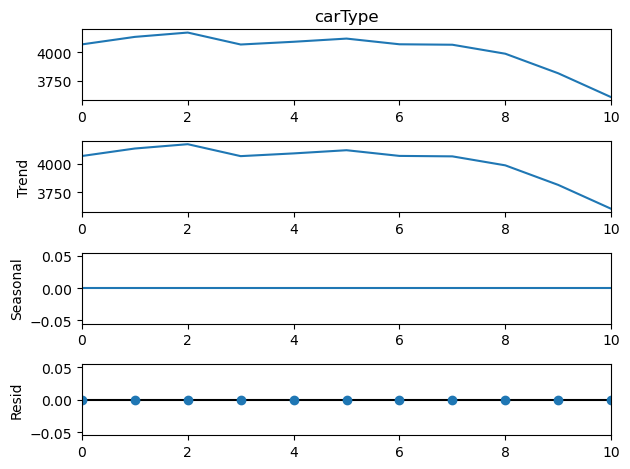

In [25]:
decomposition = seasonal_decompose(x=data.query('carType == "ICE"').groupby(["year"], as_index=False).count()["carType"], model='additive', period = 1) 
decomposition.plot()

All EV cars are automatic, not manual. All EVs are automatic. EVs are power-efficient throughout their revs, unlike fuel engines which have a narrow rev band in which they can deliver maximum performance. EVs need only one gear.(based on https://www.rivervaleleasing.co.uk/guides/electric-vehicle-leasing/are-electric-cars-automatic-or-manual#:~:text=reach%20maximum%20torque.-,Are%20electric%20cars%20automatic%20or%20manual%3F,EVs%20need%20only%20one%20gear.)

However, there is a few companies started to invent EV cars with manual transmission and introduced it around 2022 and it is still new!! (based on https://www.motorbiscuit.com/electric-vehicles-manual-transmissions/ and https://robbreport.com/motors/cars/manual-transmission-electric-vehicles-future-1234774864/)

In [8]:
gear_data = dict(data["gear"].value_counts())
gear_data

{'Manual': 30309, 'Automatic': 15706, 'Semi-automatic': 56}

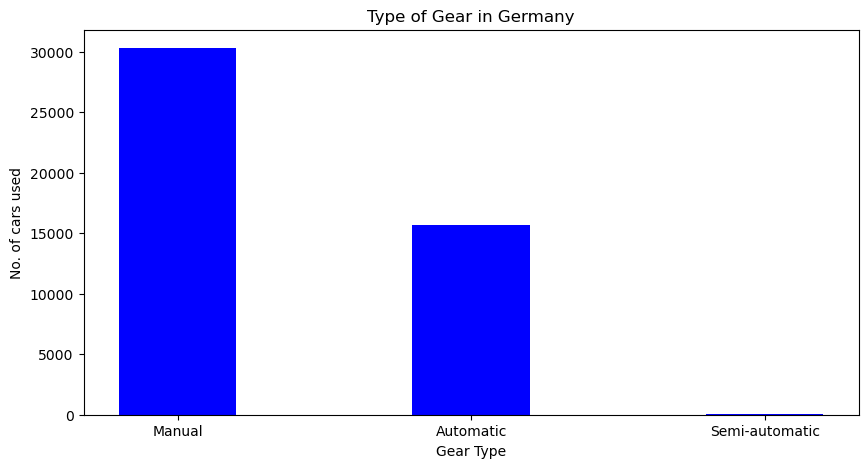

In [10]:
cat = list(gear_data.keys())
freq = list(gear_data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(cat, freq,color ='blue',
        width = 0.4, label = list(map(str,gear_data.values())))
 
plt.xlabel("Gear Type")
plt.ylabel("No. of cars used")
plt.title("Type of Gear in Germany")
plt.show()

Based on the bar chart, cars with manual transmission are two times bigger than cars with automatics and it is less amount of cars with semi-automatic.

In [61]:
#check data with manual gear type
data.query('gear =="Manual"')


,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46066,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46067,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46068,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46069,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [69]:
data["price"].min()

1100

In [62]:
data.query('gear =="Manual"')["fuel"].value_counts()

Gasoline             21804
Diesel                7922
Electric/Gasoline      301
LPG                    109
CNG                     95
Others                  37
-/- (Fuel)              16
Electric                16
Electric/Diesel          7
Ethanol                  2
Name: fuel, dtype: int64

Impossible! Records with manual gear should not have electric fuel.  

In [63]:
data.query('gear =="Manual" & fuel =="Electric/Gasoline"')

,mileage,make,model,fuel,gear,offerType,price,hp,year
195,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10680,69.0,2021
197,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10980,69.0,2021
198,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10980,69.0,2021
394,9990,Ford,Fiesta,Electric/Gasoline,Manual,Employee's car,15970,125.0,2020
395,6315,Ford,Fiesta,Electric/Gasoline,Manual,Employee's car,16450,125.0,2020
...,...,...,...,...,...,...,...,...,...
46066,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46067,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46068,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46069,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [66]:
data.query('gear =="Manual" & fuel =="Electric/Gasoline" & make =="Fiat"')

,mileage,make,model,fuel,gear,offerType,price,hp,year
195,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10680,69.0,2021
197,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10980,69.0,2021
198,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10980,69.0,2021
999,10,Fiat,500C,Electric/Gasoline,Manual,Pre-registered,15990,69.0,2021
1000,10,Fiat,500C,Electric/Gasoline,Manual,Pre-registered,15990,69.0,2021
...,...,...,...,...,...,...,...,...,...
46066,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46067,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46068,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46069,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [70]:
data.query('gear =="Manual" & fuel =="Electric/Gasoline" & make =="Fiat"')["offerType"].value_counts()

Pre-registered    134
Demonstration      23
Used                7
Name: offerType, dtype: int64

In [ ]:
data.query('gear =="Manual" & fuel =="Electric/Gasoline" & make =="Fiat"')["model"].value_counts()

In [60]:
#dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]
temp2 = temp1.query('make=="Fiat" & model == "500"')
temp2

,mileage,make,model,fuel,gear,offerType,price,hp,year
1645,10,Fiat,500,Electric/Gasoline,Manual,Pre-registered,11488,69.0,2021
1836,15,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12780,69.0,2021
2647,1111,Fiat,500,Electric/Gasoline,Manual,Pre-registered,13090,69.0,2020
2648,1111,Fiat,500,Electric/Gasoline,Manual,Pre-registered,13090,69.0,2020
2649,1111,Fiat,500,Electric/Gasoline,Manual,Pre-registered,13090,69.0,2020
...,...,...,...,...,...,...,...,...,...
46066,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46067,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46068,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46069,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [44]:
manual_gear_data[manual_gear_data["fuel"]=="Electric/Gasoline"]["make"].value_counts()

Fiat          164
Ford           69
Suzuki         27
Hyundai        21
Mazda          14
Honda           4
Toyota          1
Volkswagen      1
Name: make, dtype: int64

In [30]:
fuel_feat = dict(data["fuel"].value_counts())
fuel_feat

{'Gasoline': 28720,
 'Diesel': 15178,
 'Electric/Gasoline': 1146,
 'Electric': 661,
 'LPG': 125,
 'CNG': 116,
 'Electric/Diesel': 53,
 'Others': 47,
 '-/- (Fuel)': 22,
 'Ethanol': 2,
 'Hydrogen': 1}

In [31]:
len(fuel_feat)

11

ICE - Gasoline, Diesel, LPG, CNG, Ethanol, Hydrogen, -/- (Fuel), 
EV - Electric/Gasoline, Electric, Electric/Diesel

In [33]:
temp_data = data[data["fuel"]=="Electric/Gasoline"]
temp_data

,mileage,make,model,fuel,gear,offerType,price,hp,year
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
63,84600,Toyota,Yaris,Electric/Gasoline,Automatic,Used,8990,143.0,2014
175,23490,Audi,A6,Electric/Gasoline,Automatic,Used,59440,367.0,2020
176,19000,Audi,Q5,Electric/Gasoline,Automatic,Demonstration,59850,367.0,2020
184,999,Audi,A7,Electric/Gasoline,Automatic,Used,66890,367.0,2020
...,...,...,...,...,...,...,...,...,...
46066,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46067,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46068,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46069,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [34]:
temp_data["gear"].value_counts()

Automatic    845
Manual       301
Name: gear, dtype: int64

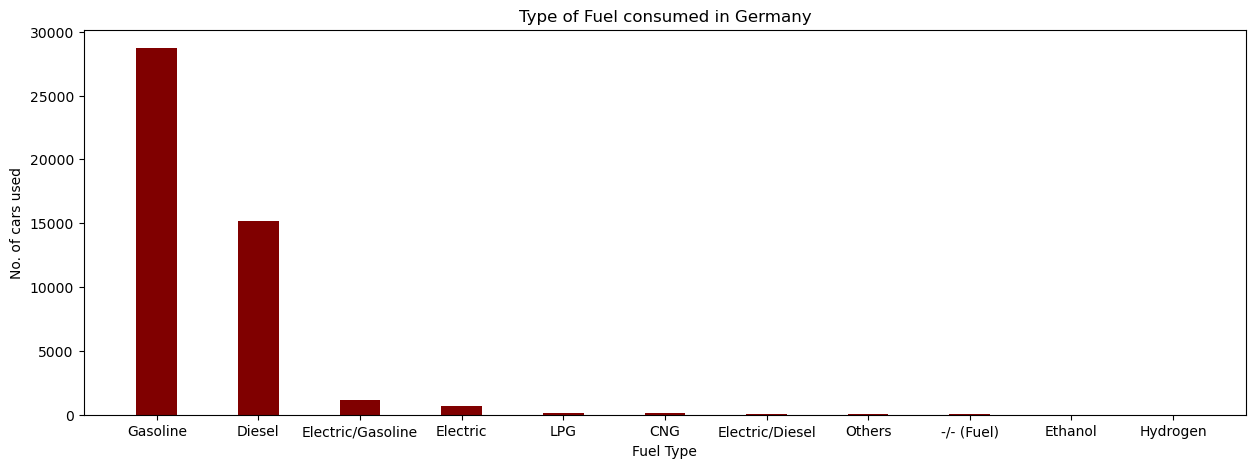

In [37]:
cat = list(fuel_feat.keys())
freq = list(fuel_feat.values())
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(cat, freq,color ='maroon',
        width = 0.4, label = list(map(str,fuel_feat.values())))
 
plt.xlabel("Fuel Type")
plt.ylabel("No. of cars used")
plt.title("Type of Fuel consumed in Germany")
plt.show()

In [15]:
data["offerType"].value_counts()

Used              39822
Pre-registered     2768
Demonstration      2351
Employee's car     1117
New                  13
Name: offerType, dtype: int64

In [14]:
data["gear"].value_counts()

Manual            30309
Automatic         15706
Semi-automatic       56
Name: gear, dtype: int64